In [1]:
import wave
import struct
import librosa
import IPython.display as ipd
from google.colab import drive

In [2]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
inputFilePath="/content/drive/MyDrive/First year/Second sem/Security and forenics 2/Assignment 2/AVADHESH CHAMOLA - cover_audio.wav"
outputFilePath="/content/drive/MyDrive/First year/Second sem/Security and forenics 2/Assignment 2/output.wav"

In [4]:
def readFile(filename):
    w = wave.open(filename,'r')
    nchannels, sample_width, sample_rate, nframes, comptype, compname = w.getparams()
    assert nchannels == 2 and sample_width == 2 and comptype == 'NONE'
    frames = w.readframes(nframes * nchannels)
    sound = struct.unpack_from((str(nframes)+'h') * nchannels, frames)
    w.close()
    print("Read successfully")
    return nchannels,sample_width,sample_rate,sound

In [5]:
def writeFile(filename, sample_rate, n_channels, sample_width, sound):
    w=wave.open(filename, "w")
    w.setnchannels(n_channels)
    w.setsampwidth(sample_width)
    w.setframerate(sample_rate)
    for i in range(0, len(sound)):
        w.writeframesraw(struct.pack('<h', sound[i]))
    print("file is successfully written")
    w.close()

In [6]:
threshold=1242
key=99999

In [7]:
def hideData(InputFile,OutputFile,secret_message,threshold,key):
    secret_message += "$$$$$"
    msg=""
    for i in secret_message:
        #print(ord(i),format(ord(i), '07b'))
        msg+=(format(ord(i), '07b'))
    channels,swidth,srate,sound=readFile(InputFile)
    modified=list(sound)
    indices=[index for index,element in enumerate(sound) if abs(element)>threshold]
    j=key
    size=len(indices)
    if(len(msg)>len(indices)):
        print("Message size is greater the cover")
        return
    print("After converting to ASCII Value length",len(msg),"bits")
    for i in range(len(msg)):
        q=sound[indices[j]]
        bi="{0:b}".format(q).zfill(16)
        mbi=bi[:-1]+msg[i]
        val=int(mbi,2)
        modified[indices[j]]=val
        indices.pop(j)
        size-=1
        #print(i," ",msg[i]," ",j," ",bi," ",mbi," ",q," ",val)
        j=(i+j+indices[j])%size
    writeFile(OutputFile,srate,channels,swidth,modified)   

In [8]:
def showData(InputFile,key):
    threshold=1242
    channels,swidth,srate,sound=readFile(InputFile)
    indices=[index for index,element in enumerate(sound) if abs(element)>threshold]
    j=key
    temp=""
    secret_message=""
    size=len(indices)
    i=0
    while(size>0):
        q=sound[indices[j]]
        bi="{0:b}".format(q).zfill(16)
        #print(i,j,bi[-1])
        temp+=bi[-1]
        indices.pop(j)
        size-=1
        #print(i," ",j," ",bi," ",temp," ",secret_message)
        j=(i+j+indices[j])%size
        i+=1
        if(len(temp)==7):
            secret_message+=chr(int(temp,2))
            temp=""
            if secret_message[-5:] == "$$$$$": 
                print(secret_message[:-5])
                break

#User 1 interface
##Hiding secret message into audio file


In [9]:
print("****************************************Audio Stenography*******************************************")
print()
print("      ************************Hiding secret message into audio file***************************      ")
print("\n")
message=input("Enter the message that you want to hide in audio file ")

print("You want to hide this message- '",message,"' into audio file")
print("leangth of message is- ",len(message))
hideData(inputFilePath,outputFilePath,message,threshold,key)
x, sr = librosa.load(outputFilePath) 
ipd.Audio(x, rate=sr)

Output hidden; open in https://colab.research.google.com to view.

#User 2 Interface

In [10]:
print("      ************************Retrieving orignal data from stenographed audio***************************      ")
print()
Key=input("For accessing hidden data please provide key-")
showData(outputFilePath,int(Key))

      ************************Retrieving orignal data from stenographed audio***************************      

For accessing hidden data please provide key-99999
Read successfully
Sisters and Brothers of America It fills my heart with joy unspeakable to rise in response to the warm and cordial welcome which you have given us I thank you in the name of the most ancient order of monks in the world I thank you in the name of the mother of religions and I thank you in the name of millions and millions of Hindu people of all classes and sects.My thanks, also, to some of the speakers on this platform who, referring to the delegates from the Orient, have told you that these men from far-off nations may well claim the honor of bearing to different lands the idea of toleration. I am proud to belong to a religion which has taught the world both tolerance and universal acceptance. We believe not only in universal toleration, but we accept all religions as true. I am proud to belong to a nation w

2048 Byte String

Sisters and Brothers of America It fills my heart with joy unspeakable to rise in response to the warm and cordial welcome which you have given us I thank you in the name of the most ancient order of monks in the world I thank you in the name of the mother of religions and I thank you in the name of millions and millions of Hindu people of all classes and sects.My thanks, also, to some of the speakers on this platform who, referring to the delegates from the Orient, have told you that these men from far-off nations may well claim the honor of bearing to different lands the idea of toleration. I am proud to belong to a religion which has taught the world both tolerance and universal acceptance. We believe not only in universal toleration, but we accept all religions as true. I am proud to belong to a nation which has sheltered the persecuted and the refugees of all religions and all nations of the earth. I am proud to tell you that we have gathered in our bosom the purest remnant of the Israelites Avadheshcham Sisters and Brothers of America It fills my heart with joy unspeakable to rise in response to the warm and cordial welcome which you have given us I thank you in the name of the most ancient order of monks in the world I thank you in the name of the mother of religions and I thank you in the name of millions and millions of Hindu people of all classes and sects.My thanks, also, to some of the speakers on this platform who, referring to the delegates from the Orient, have told you that these men from far-off nations may well claim the honor of bearing to different lands the idea of toleration. I am proud to belong to a religion which has taught the world both tolerance and universal acceptance. We believe not only in universal toleration, but we accept all religions as true. I am proud to belong to a nation which has sheltered the persecuted and the refugees of all religions and all nations of the earth. I am proud to tell you that we have gathered in our bosom the purest remnant of the Israelites Avadheshcha

1024 Byte

Sisters and Brothers of America It fills my heart with joy unspeakable to rise in response to the warm and cordial welcome which you have given us I thank you in the name of the most ancient order of monks in the world I thank you in the name of the mother of religions and I thank you in the name of millions and millions of Hindu people of all classes and sects.My thanks, also, to some of the speakers on this platform who, referring to the delegates from the Orient, have told you that these men from far-off nations may well claim the honor of bearing to different lands the idea of toleration. I am proud to belong to a religion which has taught the world both tolerance and universal acceptance. We believe not only in universal toleration, but we accept all religions as true. I am proud to belong to a nation which has sheltered the persecuted and the refugees of all religions and all nations of the earth. I am proud to tell you that we have gathered in our bosom the purest remnant of the Israelites Avadheshcham

100 Byte

Sisters and Brothers of America It fills my heart with joy unspeakable to rise in response to the wa

In [11]:
channels,swidth,srate,isound=readFile(inputFilePath)
channelso,swidtho,srateo,osound=readFile(outputFilePath)

Read successfully
Read successfully


In [12]:
z=[]
w=[]
for i in range(len(isound)):
    if(osound[i]-isound[i]!=0):
        z.append(i)
        w.append(osound[i])

<Figure size 432x288 with 0 Axes>

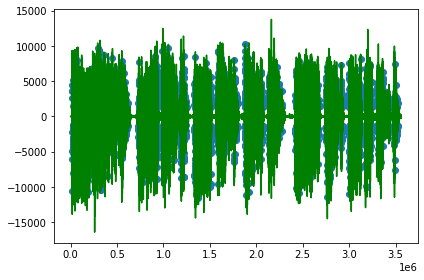

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
plt.plot(isound,color="green")
plt.scatter(z,w)
plt.tight_layout()
plt.figure()